Saving 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv to 3. Predict Disease Outcome Based on Genetic and Clinical Data (5).csv
✅ Accuracy: 0.9736842105263158

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



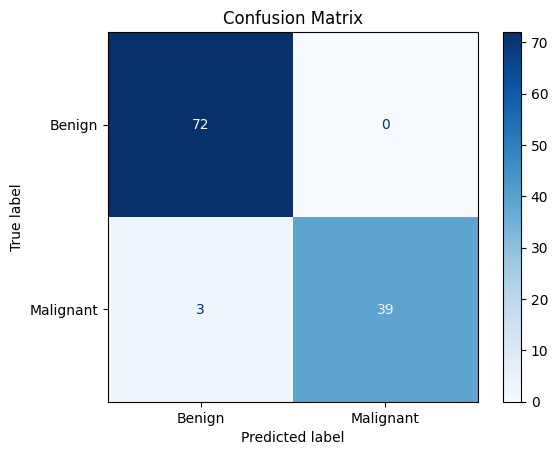

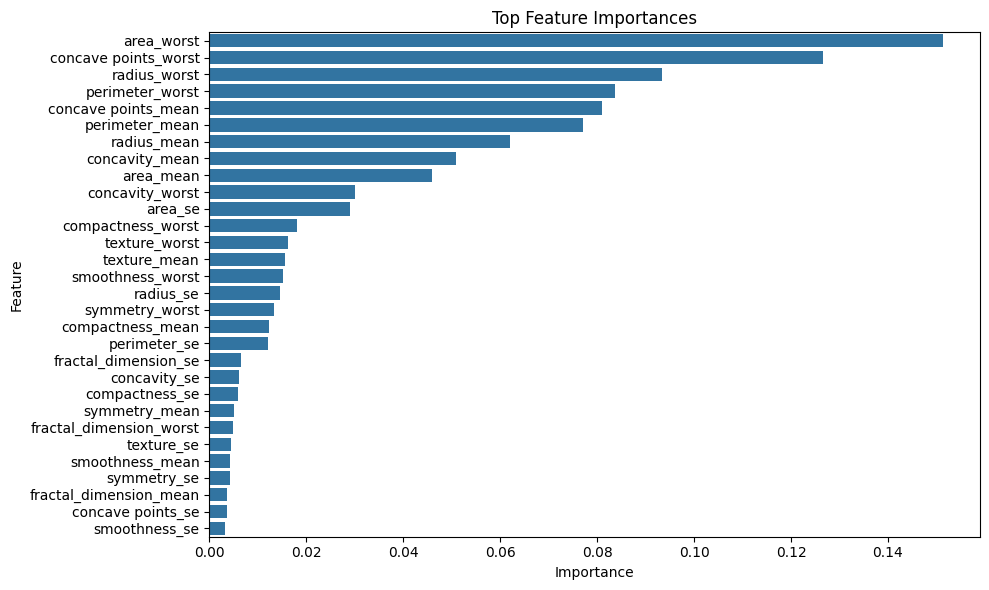

In [14]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ✅ Load the dataset
# Make sure the CSV is uploaded to Colab with this exact name
from google.colab import files
uploaded = files.upload()

# Load it into pandas
df = pd.read_csv("3. Predict Disease Outcome Based on Genetic and Clinical Data.csv")

# ✅ Clean the data
df.drop(columns=["id", "Unnamed: 32"], inplace=True, errors='ignore')
df["diagnosis"] = df["diagnosis"].map({'M': 1, 'B': 0})  # Encode target

# ✅ Split features and labels
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# ✅ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# ✅ Predictions and evaluation
y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# ✅ Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Top Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


